<div style="background-color: #150050;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 23px;
           color: white;
           margin-top: 11px;
           font-weight: 500;">
           Let's see Top 10 Data Augmentation Techniques in Pytorch using <span style="color: #65B741">transforms<span> <br> (a module within torchvision library).
</h1>
</div>

In [1]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
# read the image
img = Image.open('/kaggle/input/cat-image-for-data-augmentation-demo/cat_image.jpg')

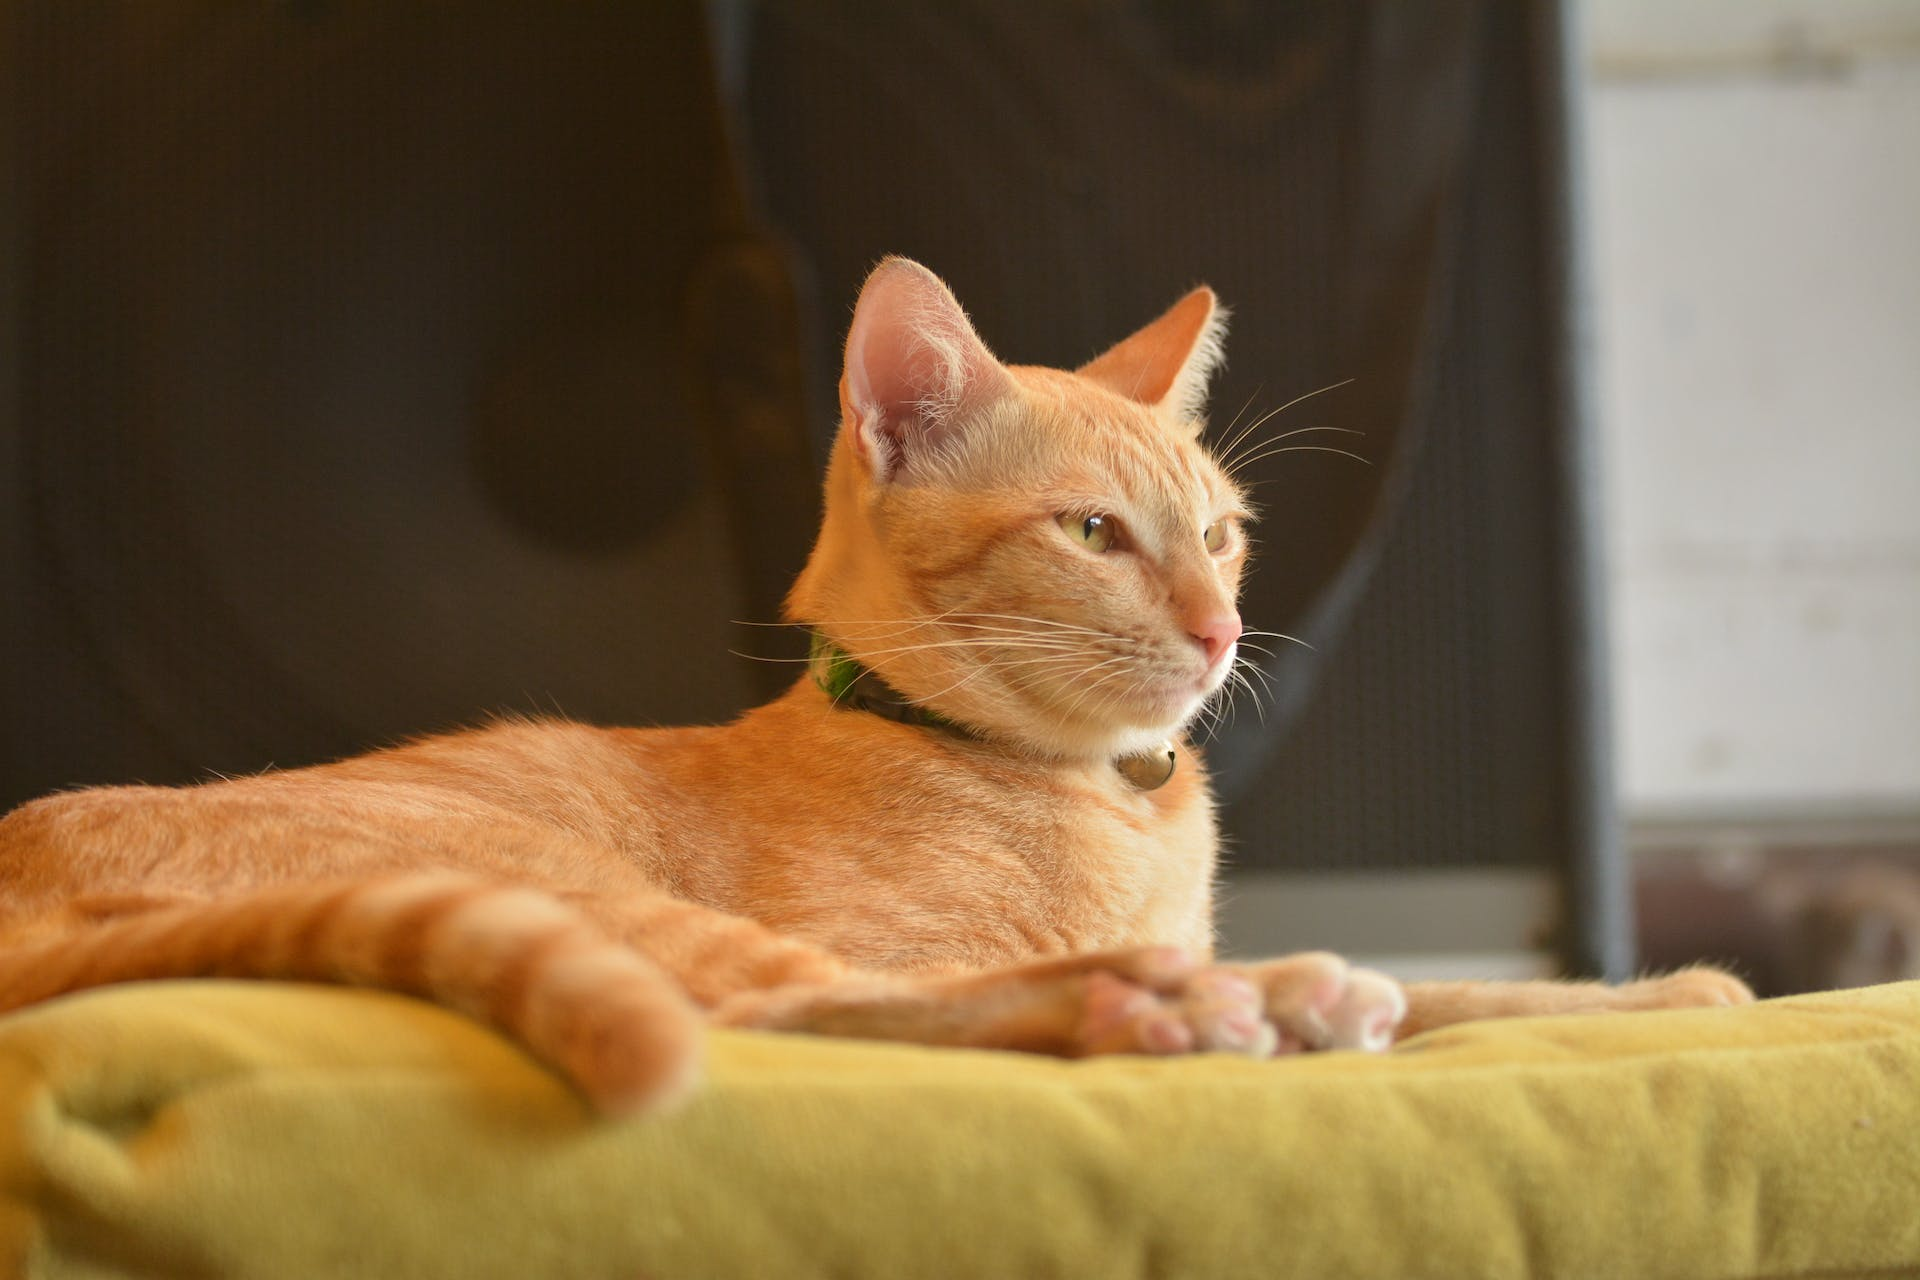

In [3]:
# let's view the image
img

In [4]:
# let's check type and size of image
type(img), img.size

(PIL.JpegImagePlugin.JpegImageFile, (1920, 1280))

> #### so currently out image type is PILImage.

<div style="background-color: #150050;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 25px;
           color: white;
           margin-top: 11px;
           font-weight: 500;">
           1. Convert PILImage to torch.Tensor()
</h1>
</div>

In [5]:
# define a transform to convert image to torch Tensor from PIL or numpy
transform1 = transforms.ToTensor()

# apply transformation on image
tensor_image = transform1(img)
type(tensor_image), tensor_image.size() # will return format C x H x W

(torch.Tensor, torch.Size([3, 1280, 1920]))

> #### now our image is of torch.Tensor type

<div style="background-color: #150050;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 25px;
           color: white;
           margin-top: 11px;
           font-weight: 500;">
           2. Normalize the image
</h1>
</div>

> ### permute() function in pytorch is a powerful tool for rearranging dimensions in tensors. It allows you to change the order of elements in a tensor without affecting it's overall size or data.

> ### **Pytorch** modules processing image data expect tensors in the format **C x H x W** <br> whereas **PiLLow** and **Matplotlib** expect image arrays in format **H x W x C**

torch.Size([3, 1280, 1920])


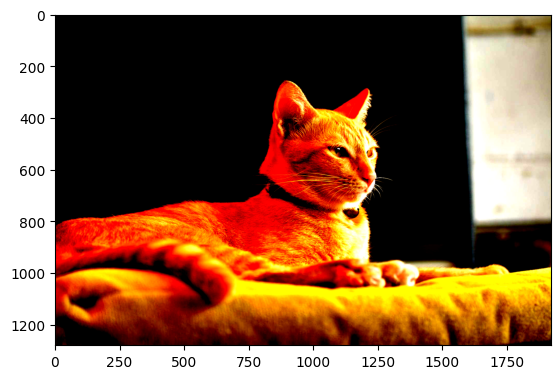

In [6]:
transform2 = transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.25, 0.25, 0.25))

normalize_image = transform2(tensor_image)

print(normalize_image.shape)

plt.imshow(normalize_image.permute(1, 2, 0))
# putting channel as last dimension, as required by matplotlib (H x W x C)

plt.show();

<div style="background-color: #150050;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 25px;
           color: white;
           margin-top: 11px;
           font-weight: 500;">
           3. Crop the image
</h1>
</div>

In [7]:
# define a transform to crop the image at center
transform3 = transforms.CenterCrop((150, 500)) # Height x Width

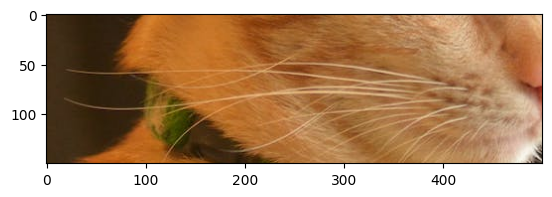

In [8]:
# crop the image using above defined transform
crop_img = transform3(tensor_image)
plt.imshow(crop_img.permute(1,2,0))
plt.show();

<div style="background-color: #150050;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 25px;
           color: white;
           margin-top: 11px;
           font-weight: 500;">
           4. Random Horizontal Flip
</h1>
</div>

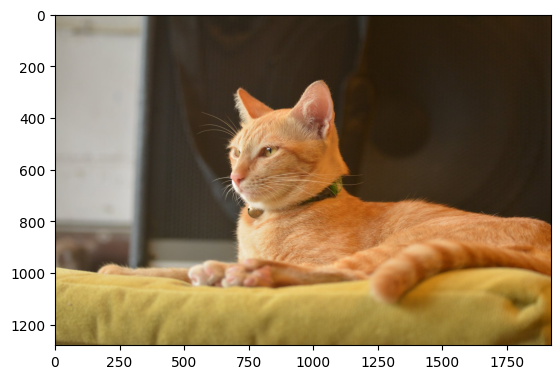

In [9]:
transform4 = transforms.RandomHorizontalFlip(p=0.9)
random_horizontal_flip_image = transform4(tensor_image)

plt.imshow(random_horizontal_flip_image.permute(1, 2, 0))
plt.show();

<div style="background-color: #150050;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 25px;
           color: white;
           margin-top: 11px;
           font-weight: 500;">
           5. Random Rotation
</h1>
</div>

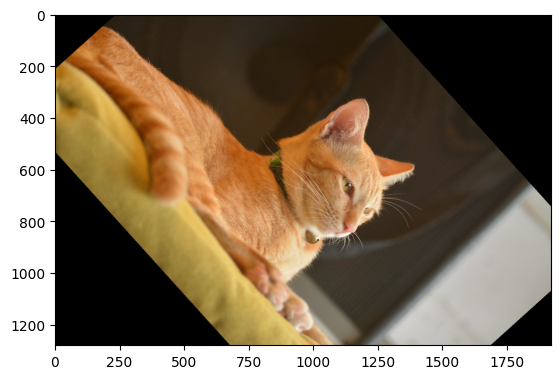

In [10]:
transform5 = transforms.RandomRotation(degrees=180)
random_rotation_image = transform5(tensor_image)

plt.imshow(random_rotation_image.permute(1,2,0))
plt.show();

<div style="background-color: #150050;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 25px;
           color: white;
           margin-top: 11px;
           font-weight: 500;">
           6. Grayscale image conversion
</h1>
</div>

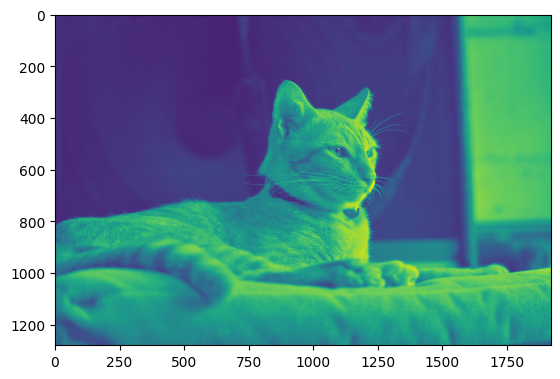

In [11]:
transform6 = transforms.Grayscale(num_output_channels=1)
gray_scale_image = transform6(tensor_image)

plt.imshow(gray_scale_image.permute(1,2,0))
plt.show();

<div style="background-color: #150050;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 25px;
           color: white;
           margin-top: 11px;
           font-weight: 500;">
           7. Adjust Brightness, Contrast and Sharpness
</h1>
</div>

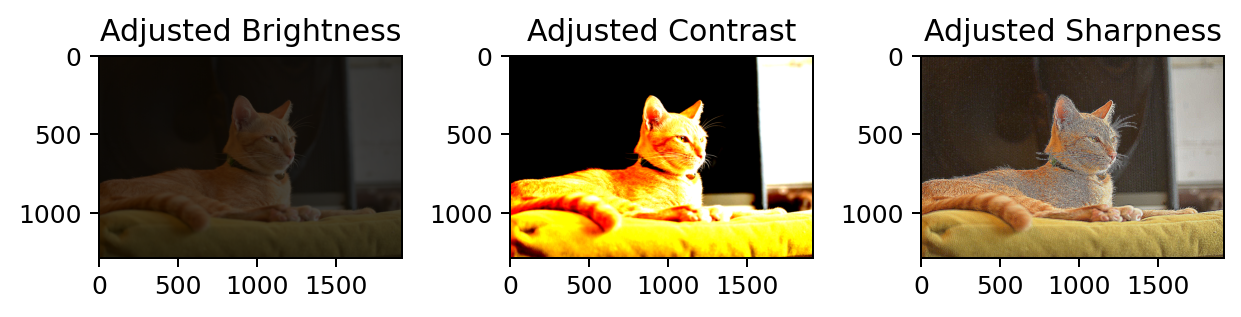

In [12]:
fig, axes = plt.subplots(1,3, figsize=(7,2), dpi=180)

transform7 = transforms.functional.adjust_brightness(tensor_image, brightness_factor=0.3)
axes[0].imshow(transform7.permute(1,2,0))
axes[0].set_title('Adjusted Brightness')

transform8 = transforms.functional.adjust_contrast(tensor_image, contrast_factor=3.8)
axes[1].imshow(transform8.permute(1,2,0))
axes[1].set_title('Adjusted Contrast')

transform9 = transforms.functional.adjust_sharpness(tensor_image, sharpness_factor=100)
axes[2].imshow(transform9.permute(1,2,0))
axes[2].set_title('Adjusted Sharpness')

plt.tight_layout()
plt.show();

<div style="background-color: #150050;
            border-radius: 10px;
            border-style: solid;">
<h1 style="text-indent: 1%;
           font-size: 25px;
           color: white;
           margin-top: 11px;
           font-weight: 500;">
           8. Randomly Erase some portion of image
</h1>
</div>

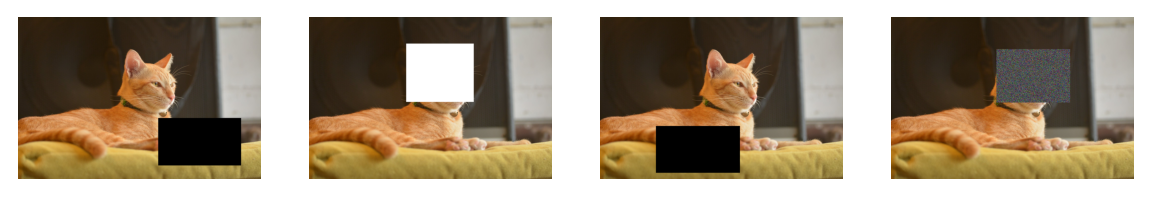

In [14]:
"""
About: transfomrs.RandomErasing() parameters

# p (float, optional) :- probability that the random erasing operation will be performed.
# scale (tuple of python:float, optional) :– range of proportion of erased area against input image.
# ratio (tuple of python:float, optional) :– range of aspect ratio of erased area.
# value (number or tuple of numbers) :– erasing value. Default is 0.
                                        If a single int, it is used to erase all pixels.
                                        If a tuple of length 3, it is used to erase R, G, B channels respectively.
                                        If a str of ‘random’, erasing each pixel with random values.
# inplace (bool, optional) :– boolean to make this transform inplace. Default set to False.

"""
value = [0, 1, 0, 'random'] # assigning some possible values of "value parameter".

fig = plt.figure(figsize=(8,2), dpi=180)
rows, cols = 1, 4

for i in range(4):
    fig.add_subplot(rows, cols, i+1)

    transform10 = transforms.RandomErasing(p=1.0, scale=(0.1, 0.1), value=value[i], inplace=False)
    transformed_image = transform10(tensor_image) # apply transformation

    plt.imshow(transformed_image.permute(1,2,0))  # permute it from pytorch to matplotlib format and show
    plt.axis('off')

plt.show();


<div style="background-color: white;
            border-radius: 7px;
            border-style: solid;">
    
<h1 style="text-align: center;
           font-size: 30px;
           color: black;
           margin-top: 11px;
           font-weight: 500;">
           If you find this notebook helpful, upvoting it will encourage me :)
</h1>
</div>